# Initialization
This file connects to the un-normalized Enrollment Data and performs some basic EDA on the data.

In [5]:
# importing the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt



## Establishing connection to the SQL database
Using enrollment4EDA.db as the database file

In [2]:
# configuring the sql connection and query execution
_       = os.sep
src     = ".."+_+".."+_+".."
conn    = sqlite3.connect(src+_+"Data"+_+"EnrollmentData"+_+"enrollment4EDA.db")
cur     = conn.cursor()

def runQuery(query, commiting=False):
    cur.execute(query)
    if commiting:
        conn.commit()
    return pd.DataFrame(cur.fetchall(), columns=[i[0] for i in cur.description])

In [3]:
# example test query
runQuery("""
    SELECT rec_id, stu_id
    FROM enrollment4EDA
    LIMIT 5;
""")

,rec_id,stu_id
0,0,CEC3286
1,1,CEC3289
2,2,CEC865
3,3,CEC865
4,4,CEC901


## Importing the pandas dataframe

In [4]:
df = pd.read_pickle(
    src+_+"Data"+_+"EnrollmentData"+_+"enrollment.pkl"
)

# EDA

In [36]:
df.head().T

,0,1,2,3,4
rec_id,0,1,2,3,4
rec_ext_date,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00
file_name,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...,..\TeamProphecyRawData\EnrollmentData\CEC Grad...
file_index,5,6,10,11,12
reg_term_code,201770,201770,201770,201770,201770
reg_term_year,2017,2017,2017,2017,2017
reg_term_name,Fall,Fall,Fall,Fall,Fall
reg_term_desc,Fall 2017,Fall 2017,Fall 2017,Fall 2017,Fall 2017
stu_id,CEC3286,CEC3289,CEC865,CEC865,CEC901
stu_deg_level,Master,Master,Master,Master,Master


In [123]:
# Total Number of Students in the Enrollment Dataset
df.stu_id.nunique()

6119

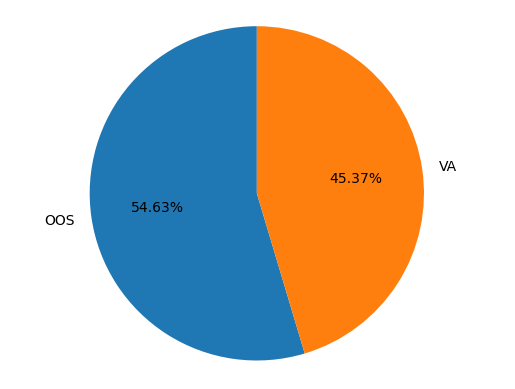

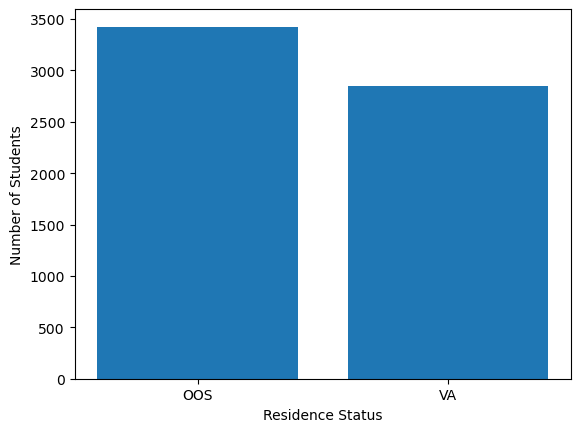

In [142]:
# Number of Students based on Residence Status
df_stuRes = runQuery("""
    SELECT stu_res, COUNT(DISTINCT stu_id) AS num_students
    FROM enrollment4EDA
    GROUP BY stu_res;
""")
df_stuRes

# Plotting a pie chart for the same with the number of students as labels
plt.pie(
    df_stuRes.num_students,
    labels=df_stuRes.stu_res,
    autopct='%2.2f%%',
    startangle=90
)
plt.axis('equal')
plt.show()